In [ ]:
import os
import sys

import pandas as pd
import numpy as np
from scripts.csvtopaquet import csv_to_parquet_single_file

current_directory = os.getcwd()
csv1_file_path = os.path.join(current_directory, '01-data', 'ex_fraud.csv')
csv2_file_path = os.path.join(current_directory, '01-data', 'ex_fraud2.csv')
csv3_file_path = os.path.join(current_directory, '01-data', 'ex1_Base.csv')
csv4_file_path = os.path.join(current_directory, '01-data', 'FD_creditcard_data.csv')

output_file_path1 = os.path.join(current_directory, '01-data', 'ex_fraud.parquet')
output_file_path2 = os.path.join(current_directory, '01-data', 'ex_fraud2.parquet')
output_file_path3 = os.path.join(current_directory, '01-data', 'ex1_Base.parquet')
output_file_path4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')
output_file_path5 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')
csv_to_parquet_single_file(csv_file_path=csv1_file_path, output_file_path=output_file_path1, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv2_file_path, output_file_path=output_file_path2, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv3_file_path, output_file_path=output_file_path3, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv4_file_path, output_file_path=output_file_path4, chunksize=100000, sample_rows=None, drop_columns=None)

In [ ]:
current_directory = os.getcwd()
parquetFile1 = os.path.join(current_directory, '01-data', 'ex_fraud.parquet')
parquetFile2 = os.path.join(current_directory, '01-data', 'ex_fraud2.parquet')
parquetFile3 = os.path.join(current_directory, '01-data', 'ex1_Base.parquet')
parquetFile4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')
parquetFile5 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')

df1 = pd.read_parquet(parquetFile1)
df2 = pd.read_parquet(parquetFile2)
df3 = pd.read_parquet(parquetFile3)
df4 = pd.read_parquet(parquetFile4)
df5 = pd.read_parquet(parquetFile5)


print('df1:', df1.dtypes)
print('')
print('df2:',df2.dtypes)
print('')
print('df3:',df3.dtypes)
print('')
print('df4:',df4.dtypes)


# Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Importing numpy
from sklearn.model_selection import train_test_split

# Assuming your DataFrame and target variable setup
X = df4.drop(['Class','id'], axis=1)
Y = df4['Class']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.Logit(Y, X).fit()

# Get model summary
print(model.summary())


# Descision Tree

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Assuming your DataFrame and target variable setup
X = df4.drop(['Class','id'], axis=1)
Y = df4['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Training a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = dt_model.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy1 * 100:.2f}%")

# Functions for calculating and estimating entropy are assumed to be correctly implemented as per your initial snippet
# average_entropy_at_depths = estimate_entropy_at_depths(dt_model, X_train, y_train)
# for depth, entropy in average_entropy_at_depths.items():
#     print(f"Depth {depth}: Average Entropy = {entropy:.4f}")

# Decision Tree visualization (truncated to the first 3 levels for simplicity)
plt.figure(figsize=(20,15))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['0', '1'], max_depth=5, fontsize=10)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# Displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Printing the classification report
report = classification_report(y_test, y_pred)
print(report)

# Displaying feature importances
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
print(feature_importances)



# Random Forest

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Changed from DecisionTreeClassifier to RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators and other parameters as needed
rf_model.fit(X_train, y_train)

single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20,10))
# Plot the single decision tree
plot_tree(single_tree, 
          feature_names=X.columns, 
          class_names=['Class 0', 'Class 1'],  # Adjust class names as necessary
          filled=True, 
          rounded=True, 
          max_depth=10)  # Limiting tree depth for easier visualization; adjust as needed

plt.title("Visualizing a Single Decision Tree from Random Forest")
plt.show()

y_pred = rf_model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy2 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# Feature Importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
print(feature_importances)


# KNN

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and Y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is a key parameter
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Model Accuracy
accuracy3 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy3 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


# Gaussian 

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Assuming X and Y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the Gaussian Naive Bayes Classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predictions
y_pred = gnb_model.predict(X_test)

# Model Accuracy
accuracy4 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy4 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
print(f"Model Accuracy(Descision Tree): {accuracy1 * 100:.2f}%")
print(f"Model Accuracy(Random Forest): {accuracy2 * 100:.2f}%")
print(f"Model Accuracy(KNN): {accuracy3 * 100:.2f}%")
print(f"Model Accuracy(Gaussian): {accuracy4 * 100:.2f}%")


# SMOTE

In [ ]:

df5 = df5.fillna(0)
df5.columns = df5.columns.str.replace('[^a-zA-Z0-9_]', '_')
df5.columns = df5.columns.str.replace('/', '_')


print('train Data:')
print(df5.dtypes)
print('')

train = df5

current_data = pd.concat([train], axis=0)


## data cleaning

In [ ]:
import pandas as pd

# Then proceed with training your LightGBM model
dataset=current_data

print('dataset:',dataset['TARGET'].dtypes)
# Splitting the DataFrame into object and numeric DataFrames
current_data_object = dataset.select_dtypes(include=['object'])
Current_data_Numericonly = dataset.select_dtypes(include=['number'])  # This includes int, float, etc.
current_data_object.columns.tolist()
Current_data_Numericonly.columns.tolist()
columns_data = dataset.columns.values.tolist()
dummy_columns = pd.get_dummies(current_data_object, dtype=int)


merged_data = pd.concat([Current_data_Numericonly, dummy_columns], axis=1)
# Drop 'SK_ID_CURR' and columns with blank names
merged_data.drop(columns=['SK_ID_CURR'], inplace=True)
def clean_column_names(df):
    df.columns = [col.replace('{', '')
                     .replace('}', '')
                     .replace('[', '')
                     .replace(']', '')
                     .replace('"', '')
                     .replace(':', '')
                     .replace(',', '') for col in df.columns]
    return df

# Clean the column names of your DataFrame
merged_data = clean_column_names(merged_data)

print(merged_data.dtypes)

sample=merged_data.head(1)
print(merged_data.head(1).T)
print('')
print('Merged data:',merged_data.dtypes)
sample.to_csv('testmerge.csv')

print(Current_data_Numericonly.dtypes)

# To see the columns of each DataFrame
print("Object Columns:", len(current_data_object.columns.tolist()))
print("Numeric Columns:", len(Current_data_Numericonly.columns.tolist()))

columns_data[(columns_data == 'current_data')]


## Model

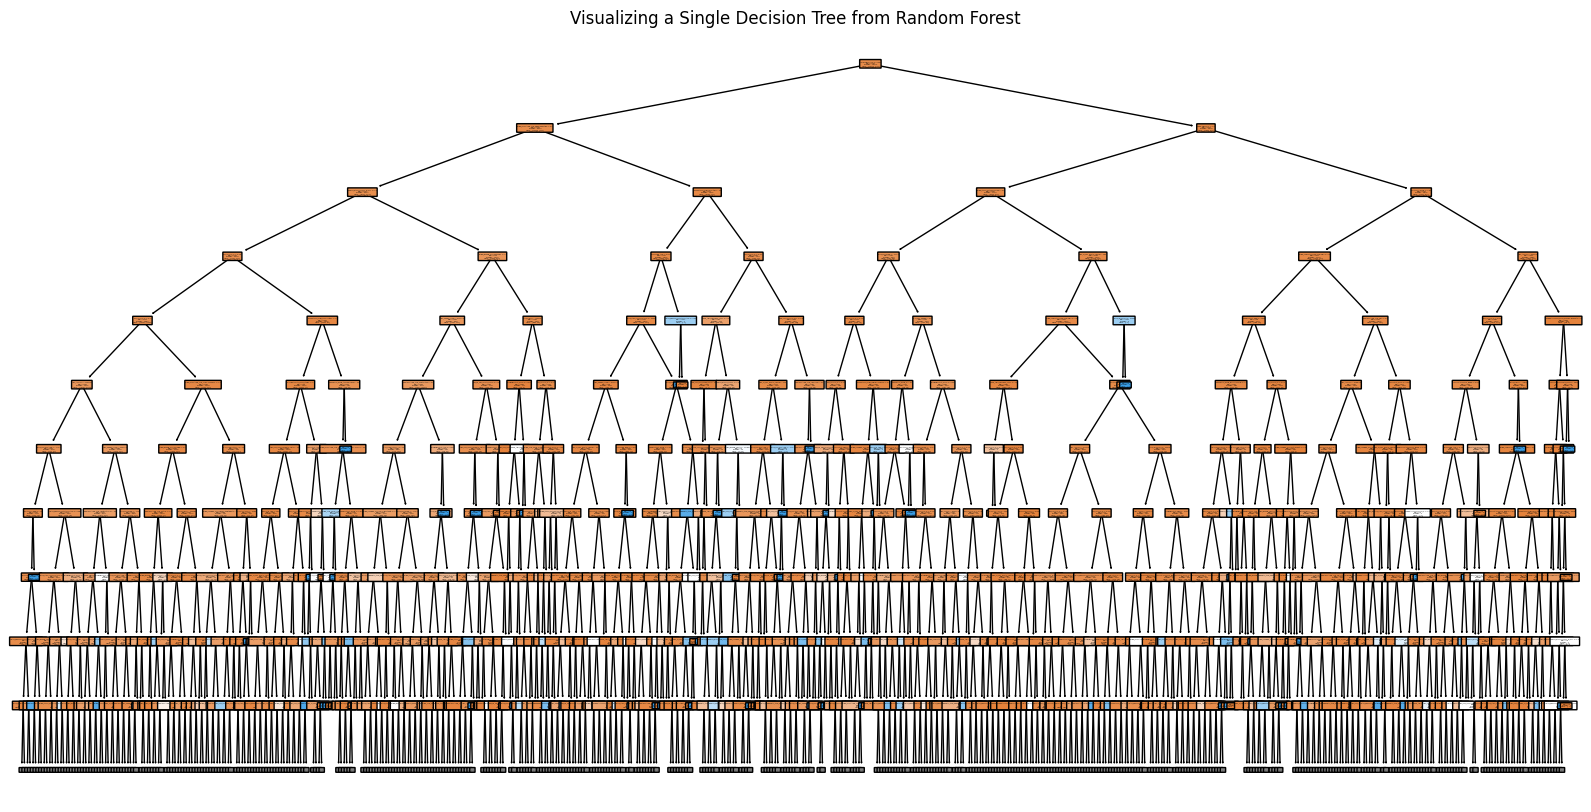

Model Accuracy: 91.97%


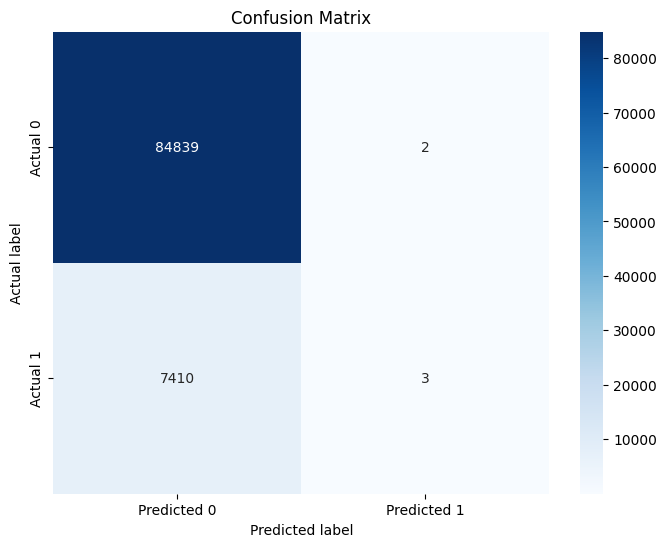

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.60      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.76      0.50      0.48     92254
weighted avg       0.89      0.92      0.88     92254

                                Importance
EXT_SOURCE_2                  4.951460e-02
EXT_SOURCE_3                  3.818314e-02
DAYS_BIRTH                    3.427492e-02
DAYS_ID_PUBLISH               3.326271e-02
DAYS_REGISTRATION             3.311677e-02
...                                    ...
FLAG_DOCUMENT_10              8.354409e-08
CODE_GENDER_XNA               5.110761e-08
NAME_INCOME_TYPE_Businessman  1.158364e-08
FLAG_DOCUMENT_12              0.000000e+00
FLAG_MOBIL                    0.000000e+00

[250 rows x 1 columns]


In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Changed from DecisionTreeClassifier to RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming your DataFrame and target variable setup
x = merged_data.drop('TARGET', axis=1)
y = merged_data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100,verbose=2)  # You can adjust n_estimators and other parameters as needed
rf_model.fit(X_train, y_train)

single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20,10))
# Plot the single decision tree
plot_tree(single_tree, 
          feature_names=x.columns, 
          class_names=['Class 0', 'Class 1'],  # Adjust class names as necessary
          filled=True, 
          rounded=True, 
          max_depth=10)  # Limiting tree depth for easier visualization; adjust as needed

plt.title("Visualizing a Single Decision Tree from Random Forest")
plt.show()

y_pred = rf_model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy2 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# Feature Importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
print(feature_importances)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
import numpy as np
import os